In [1]:
# Dependencies
import numpy as np
import pandas as pd
import sys
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table
#Matplotlib
%matplotlib inline
from matplotlib import style
style.use('seaborn-pastel')#fivethirtyeight
import matplotlib.pyplot as plt 

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for i in session.query(Station.name,Station.station).all():
    print(i)

('WAIKIKI 717.2, HI US', 'USC00519397')
('KANEOHE 838.1, HI US', 'USC00513117')
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
('PEARL CITY, HI US', 'USC00517948')
('UPPER WAHIAWA 874.3, HI US', 'USC00518838')
('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
('WAIHEE 837.5, HI US', 'USC00519281')
('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
('MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [5]:
#function for temp summaries
def tempSummary(n,month):
    data = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == n).all()
    df = pd.DataFrame({month+'Temps':[i[0] for i in data]})
    return df.describe()

In [6]:
tempSummary('06','June ')

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [7]:
tempSummary('12','December ')

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [8]:
#function for precipitation summaries
def prcpSummary(n,month):
    data = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == n).all()
    df = pd.DataFrame({month+'Precip':[i[0] for i in data]})
    return df.describe()

In [9]:
prcpSummary('06','June ')

,June Precip
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [10]:
prcpSummary('12','December ')

,December Precip
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [6]:
tempSummary('03','March ')

,March Temps
count,1693.000000
mean,70.059067
std,3.845271
min,56.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,82.000000


In [7]:
tempSummary('09','September ')

,September Temps
count,1480.000000
mean,76.164865
std,3.535178
min,64.000000
25%,74.000000
50%,76.000000
75%,79.000000
max,87.000000


In [11]:
#high low and avg for june and december temps by name
juneStats = session.query(Measurement.station,func.min(Measurement.tobs), 
               func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
               group_by(Measurement.station).\
               filter(func.strftime("%m", Measurement.date) == '06').all()
places = session.query(Station.name)
decStats = session.query(Measurement.station,func.min(Measurement.tobs), 
               func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
               group_by(Measurement.station).\
               filter(func.strftime("%m", Measurement.date) == '12').all()

#dataframes for june and december temps by station
junedf = pd.DataFrame(juneStats, columns=['station', 'min temp', 'max temp', 'avg temp'])
junedf.set_index('station', inplace=True)

decdf = pd.DataFrame(decStats, columns=['station', 'min temp', 'max temp', 'avg temp'])
decdf.set_index('station', inplace=True)

In [12]:
names = [i[0].split() for i in places]
inOahu = [i[0] for i in names]
inOahu[3]='PEARL CITY'
inOahu[4]='WAHIAWA'
inOahu

['WAIKIKI',
 'KANEOHE',
 'KUALOA',
 'PEARL CITY',
 'WAHIAWA',
 'WAIMANALO',
 'WAIHEE',
 'HONOLULU',
 'MANOA']

In [13]:
junedf

,min temp,max temp,avg temp
station,,,
USC00511918,66.0,85.0,74.139394
USC00513117,68.0,83.0,74.050847
USC00514830,67.0,81.0,76.005376
USC00516128,66.0,79.0,71.937220
USC00517948,64.0,82.0,76.655405
USC00518838,67.0,78.0,73.394737
USC00519281,65.0,82.0,73.271186
USC00519397,70.0,84.0,77.559322
USC00519523,71.0,82.0,76.668103


In [14]:
decdf

,min temp,max temp,avg temp
station,,,
USC00511918,57.0,81.0,69.684211
USC00513117,63.0,80.0,71.069444
USC00514830,62.0,79.0,73.224719
USC00516128,60.0,83.0,69.291262
USC00517948,64.0,82.0,71.834862
USC00518838,63.0,78.0,72.421053
USC00519281,58.0,79.0,69.903226
USC00519397,56.0,77.0,71.109524
USC00519523,56.0,79.0,72.433333


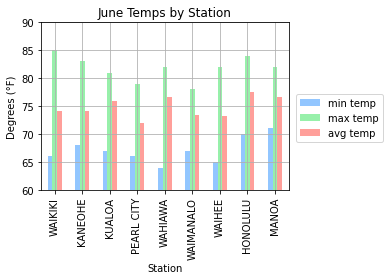

In [30]:
x = range(len(juneStats))
junedf.plot.bar(title='June Temps by Station')
plt.grid()
plt.xlabel('Station', fontsize='10')
plt.ylabel('Degrees (°F)', fontsize='10')
plt.xticks(x, inOahu, fontsize='10')
plt.ylim(60,90)
plt.yticks(fontsize='10')
plt.legend(['min temp', 'max temp', 'avg temp'],
           bbox_to_anchor=(1.4, 0.6))
plt.tight_layout()
plt.savefig('Jun Temps Station.png',facecolor='w', transparent=False, bbox_inches='tight')
plt.show()

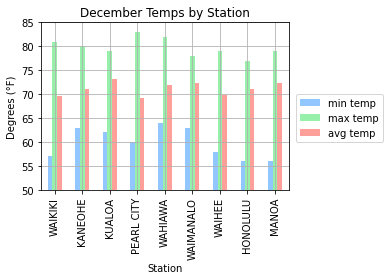

In [31]:
x = range(len(decStats))
decdf.plot.bar(title='December Temps by Station')
plt.grid()
plt.xlabel('Station', fontsize='10')
plt.ylabel('Degrees (°F)', fontsize='10')
plt.xticks(x, inOahu, fontsize='10')
plt.ylim(50,85)
plt.yticks(fontsize='10')
plt.legend(['min temp', 'max temp', 'avg temp'],
           bbox_to_anchor=(1.4, 0.6))
plt.tight_layout()
plt.savefig('Dec Temps Station.png',facecolor='w', transparent=False, bbox_inches='tight')
plt.show()

In [19]:
#high low and avg for june and december precipitation by station
juneStats2 = session.query(Measurement.station,func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
group_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == '06').all()

decStats2 = session.query(Measurement.station,func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
group_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == '12').all()

#dataframes for june and december temps by station
junedf2 = pd.DataFrame(juneStats2, columns=['station', 'min', 'max', 'avg'])
junedf2.set_index('station', inplace=True)

decdf2 = pd.DataFrame(decStats2, columns=['station', 'min', 'max', 'avg'])
decdf2.set_index('station', inplace=True)

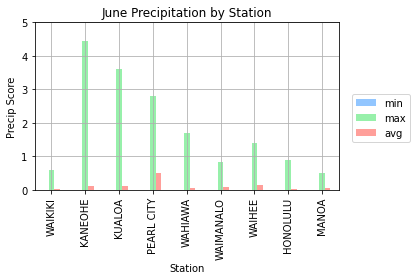

In [32]:
x = range(len(juneStats2))
junedf2.plot.bar(title='June Precipitation by Station')
plt.xlabel('Station', fontsize='10')
plt.ylabel('Precip Score', fontsize='10')
plt.xticks(x, inOahu, fontsize='10')
plt.ylim(0,5)
plt.yticks(fontsize='10')
plt.legend(['min', 'max', 'avg'],
           bbox_to_anchor=(1.25, 0.6))
plt.grid()
plt.tight_layout()
plt.savefig('Jun Precip Station.png',facecolor='w', transparent=False, bbox_inches='tight')
plt.show()

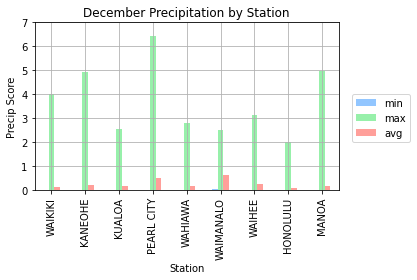

In [33]:
x = range(len(decStats2))
decdf2.plot.bar(title='December Precipitation by Station')
plt.grid()
plt.xlabel('Station', fontsize='10')
plt.ylabel('Precip Score', fontsize='10')
plt.xticks(x, inOahu, fontsize='10')
plt.ylim(0,7)
plt.yticks(fontsize='10')
plt.legend(['min', 'max', 'avg'],
           bbox_to_anchor=(1.25, 0.6))
plt.tight_layout()
plt.savefig('Dec Precip Station.png',facecolor='w', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#line graphs
fig, ax = plt.subplots()
x = range(len(juneStats))
ax.plot(junedf, marker='X',linestyle='None', markersize = 9.0)
for i in (ax.get_xticklabels() + ax.get_yticklabels()):
    i.set_fontname('Arial')
    i.set_fontsize(13)
ax.set_title('June Temps by Station')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xticklabels(inOahu)
plt.grid()
plt.tight_layout()
plt.legend(['min temp', 'max temp', 'avg temp'],
           bbox_to_anchor=(1.2, 0.6))
#fig.savefig('Jun Temps by Station.png',bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
x = range(len(decStats))
ax.plot(decdf, marker='o',linestyle='None', markersize = 9.0)
for i in (ax.get_xticklabels() + ax.get_yticklabels()):
    i.set_fontname('Arial')
    i.set_fontsize(13)
ax.set_title('December Temps by Station')
ax.tick_params(axis='x', labelrotation=90 )
ax.set_xticklabels(inOahu)
plt.grid()
plt.tight_layout()
plt.legend(['min temp', 'max temp', 'avg temp'],
           bbox_to_anchor=(1.2, 0.6))
fig.savefig('Dec Temps by Station.png',bbox_inches='tight')
plt.show()

In [ ]:
junedf2

In [ ]:
decdf2

In [ ]:
#line graphs
fig, ax = plt.subplots()
x = range(len(juneStats2))
ax.plot(junedf2,marker='X',linestyle='None', markersize = 10.0)
for i in (ax.get_xticklabels() + ax.get_yticklabels()):
    i.set_fontname('Arial')
    i.set_fontsize(13)
ax.set_title('June Precipitation by Station')
ax.tick_params(axis='x', labelrotation=90 )
ax.set_xticklabels(inOahu)
plt.grid()
plt.tight_layout()
plt.legend(['min', 'max', 'avg'],
           bbox_to_anchor=(1.15, 0.6))
fig.savefig('Jun Precip by Station.png',bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
x = range(len(decStats2))
ax.plot(decdf2,marker='o',linestyle='None', markersize = 10.0)
for i in (ax.get_xticklabels() + ax.get_yticklabels()):
    i.set_fontname('Arial')
    i.set_fontsize(13)
ax.set_title('December Precipitation by Station')
ax.tick_params(axis='x', labelrotation=90 )
ax.set_xticklabels(inOahu)
plt.grid()
plt.tight_layout()
plt.legend(['min', 'max', 'avg'],
           bbox_to_anchor=(1.0, 0.6))
#fig.savefig('Dec Precip by Station.png',bbox_inches='tight')
plt.show()

In [ ]:
## D1: Determine the Summary Statistics for June

# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# 3. Convert the June temperatures to a list.
jtemps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june = {'June Temps':[i[0] for i in jtemps]}
june

# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp = pd.DataFrame(june)
june_temp

# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp.describe()
## D2: Determine the Summary Statistics for December
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.
dtemps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec = {'December Temps':[i[0] for i in dtemps]}
dec

# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp = pd.DataFrame(dec)
dec_temp

# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp.describe()